#loading libraries

In [ ]:
pip install nltk

In [28]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



import os


#importing data

In [29]:
from google.colab import drive
drive.mount('/content/drive')
# uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df = pd.read_csv('/content/drive/MyDrive/dataset/IMDB Dataset.csv')
df=df[0:10000]

#EDA

In [31]:
df.describe()
df.shape

(10000, 2)

In [32]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
#sentiment count
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [34]:
#split the dataset
#train dataset
train_reviews=df.review[:8000]
train_sentiments=df.sentiment[:8000]
#test dataset
test_reviews=df.review[8000:]
test_sentiments=df.sentiment[8000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(8000,) (8000,)
(2000,) (2000,)


#Text Preproccessing/ Normalizing reviews

In [35]:
nltk.download('stopwords')
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

<ipython-input-36-9dc871bc1f23>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [37]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
#Stemming the text
#def simple_stemmer(text):
#    ps=nltk.porter.PorterStemmer()
#    text= ' '.join([ps.stem(word) for word in text.split()])
#    return text
#Apply function on review column
#df['review']=df['review'].apply(simple_stemmer)

In [39]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert POS tag to WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Lemmatization function
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Example text
text = "He ran and then he was running. He has been a runner."

# Lemmatize the text
lemmatized_text = lemmatize_text(text)
print("Original Text:", text)
print("Lemmatized Text:", lemmatized_text)



Original Text: He ran and then he was running. He has been a runner.
Lemmatized Text: He run and then he be run . He have be a runner .


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'i', 'ours', 'it', 'if', 'than', 'mustn', 'his', 'through', 'once', 'is', 'down', "that'll", 'll', 'needn', 'and', 'into', "didn't", 'had', 'very', 'didn', 'will', 'do', "haven't", 'hers', 'them', 'in', 'she', 'up', 'most', 'before', 'off', 'when', 'being', 'herself', 'haven', 'but', 'both', 'that', 'weren', 's', "don't", 'which', 'while', 'against', 'did', 'won', 'd', 'itself', 'can', 'during', "it's", "mustn't", 'your', 'doing', 'y', "mightn't", 'were', 'me', 'couldn', 'as', 'am', 'this', 'over', "hasn't", "needn't", "weren't", 'does', 'ourselves', 'any', 'few', 'doesn', 'theirs', 'be', 'to', "you'll", "should've", 'not', 'then', "won't", 'again', "you've", 'hadn', 'isn', 'you', 'above', 'they', 'there', 'was', 'him', 'all', 'what', 'themselves', 'an', 'from', 'no', 'm', "isn't", 'mightn', "wouldn't", 'on', 'her', 're', 'he', 'more', 'its', 'because', 'our', 'too', 'after', 'at', 'having', 'yours', 'so', 'until', 'shan', 'wouldn', 'further', 'been', 'such', 'where', 've', 'with', 's

In [42]:
#normalized train reviews
norm_train_reviews=df.review[:8000]
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

"One reviewers mentioned watching 1 Oz episode ' hooked. right , exactly happened me.The first thing struck Oz brutality unflinching scenes violence , set right word GO. Trust , show faint hearted timid. show pulls punches regards drugs , sex violence. hardcore , classic use word.It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City , experimental section prison cells glass fronts face inwards , privacy high agenda. Em City home many .. Aryans , Muslims , gangstas , Latinos , Christians , Italians , Irish .... scuffles , death stares , dodgy dealings shady agreements never far away.I would say main appeal show due fact goes shows ' dare. Forget pretty pictures painted mainstream audiences , forget charm , forget romance ... OZ ' mess around. first episode ever saw struck nasty surreal , ' say ready , watched , developed taste Oz , got accustomed high levels graphic violence. violence , injustice ( crooked guards ' sold nickel , inmates ' kil

In [43]:
#Normalized test reviews
norm_test_reviews=df.review[8000:]
#norm_test_reviews[0]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words
norm_test_reviews.iloc[2]

"Brilliant film , next best film Drunken Master ( Jackie Chan ) . recently bought original VHS ' seen film 15 years still good back then. acting terrible dubbing even worse features make film ( many old fashioned Chinese kung-fu movies ) great. choreography awesome storyline basic. never seen 36th chamber shaolin know film Gordon liu plays San Te San Te Thr Return 36th Chamber played different character. lot comedy value brilliant kung-fu ."

In [44]:
norm_test_reviews.head()

8000    Graphics : brilliant , obviously. stunning thi...
8001    go Twins Effect looking pure Hong Kong movie e...
8002    Brilliant film , next best film Drunken Master...
8003    grew 90s ; therefore , must understand witness...
8004    , Pink Flamingos lived ' reputation shocking ,...
Name: review, dtype: object

#Text Vectorization

In [45]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (8000, 1537562)
BOW_cv_test: (2000, 1537562)


In [46]:
# Convert the sparse matrix to a DataFrame
cv_train_df = pd.DataFrame(cv_train_reviews.toarray(), columns=cv.get_feature_names_out())

# Display the DataFrame
cv_train_df.head()


,00 agent,00 agent level,00 back,00 came,00 came plays,00 decided,00 decided give,00 end,00 end suits,00 far,...,île aux trente,ïn,ïn america,ïn america usual,önsjön,önsjön came,önsjön came outer,überwoman,überwoman snobby,überwoman snobby aristocrat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (8000, 1537562)
Tfidf_test: (2000, 1537562)


In [48]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(10000, 1)


In [49]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:8000]
test_sentiments=sentiment_data[8000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


#Modelling

In [50]:
from sklearn.metrics import roc_auc_score
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [51]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [52]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)
roc=roc_auc_score(test_sentiments,lr_bow_predict)
print("Auc", roc )

lr_bow_score : 0.7075
lr_tfidf_score : 0.706
Auc 0.7079049405878673


In [53]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.69      0.72      0.71       975
    Negative       0.72      0.69      0.71      1025

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000

              precision    recall  f1-score   support

    Positive       0.69      0.72      0.70       975
    Negative       0.72      0.70      0.71      1025

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



In [54]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[709 316]
 [269 706]]
[[714 311]
 [277 698]]


Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features

In [55]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [56]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [57]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.7045
svm_tfidf_score : 0.706


In [58]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.69      0.72      0.70       975
    Negative       0.72      0.69      0.70      1025

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000

              precision    recall  f1-score   support

    Positive       0.69      0.72      0.70       975
    Negative       0.72      0.70      0.71      1025

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



Multinomial Naive Bayes for bag of words and tfidf features

In [59]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [60]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [61]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)
roc=roc_auc_score(test_sentiments,mnb_bow_predict)
print("Auc", roc )


mnb_bow_score : 0.7115
mnb_tfidf_score : 0.71
Auc 0.7121075672295184


In [62]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)


              precision    recall  f1-score   support

    Positive       0.69      0.74      0.71       975
    Negative       0.73      0.69      0.71      1025

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000

              precision    recall  f1-score   support

    Positive       0.69      0.73      0.71       975
    Negative       0.73      0.69      0.71      1025

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



<function matplotlib.pyplot.show(close=None, block=None)>

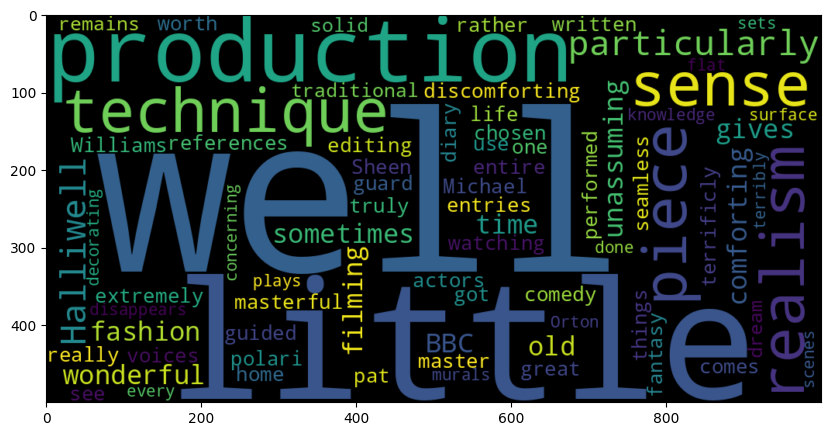

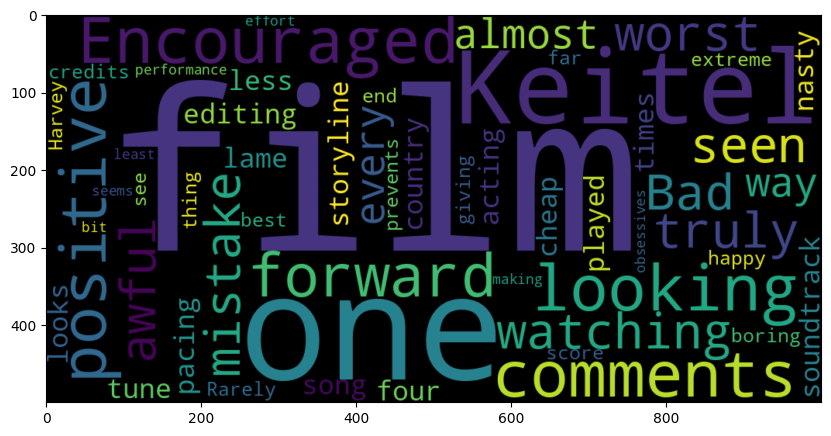

In [63]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show